<a href="https://colab.research.google.com/github/saniyakhan17/Advance-Bank-Term-Deposit/blob/main/Advance_Bank_Term_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advance Bank Term Deposit

## Introduction
This notebook provides a detailed analysis of customer behavior and insights into factors influencing term deposit subscription.

## Load Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
#
df = pd.read_csv("data.csv")

In [ ]:
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Customer Demographics Analysis

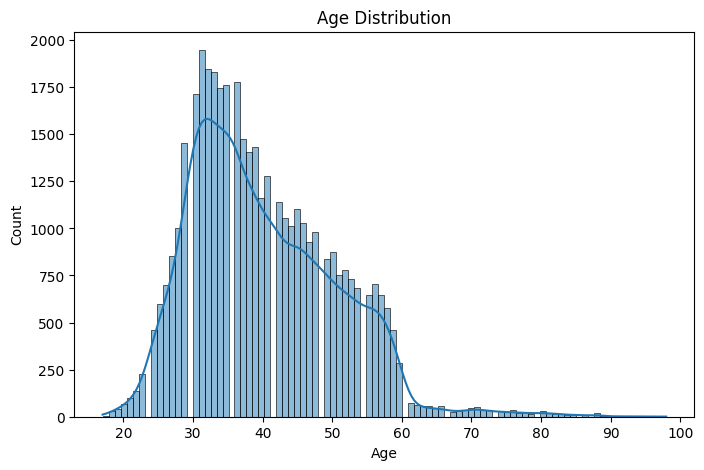

In [ ]:
# Age distribution

plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


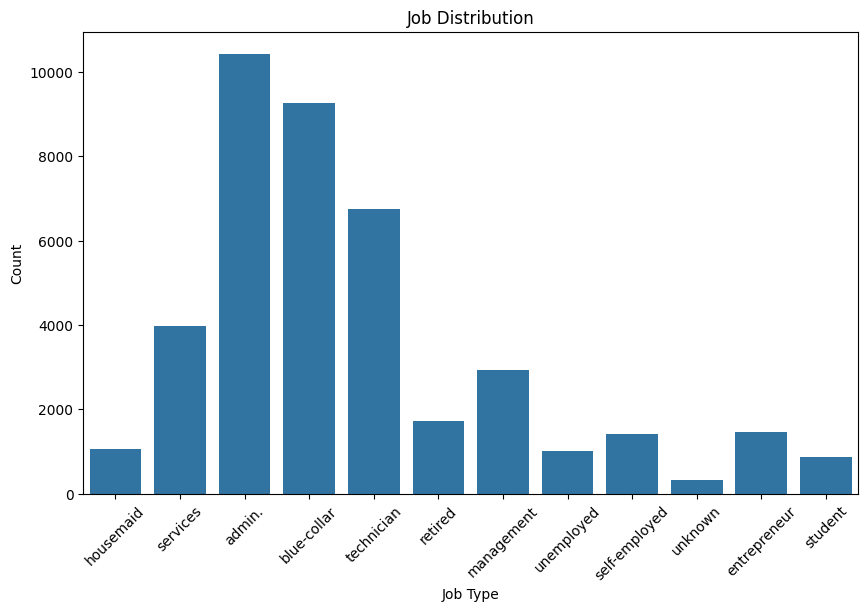

In [ ]:
# Job distribution

plt.figure(figsize=(10,6))
sns.countplot(x='job', data=df)
plt.title("Job Distribution")
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Balance & Deposit Trends

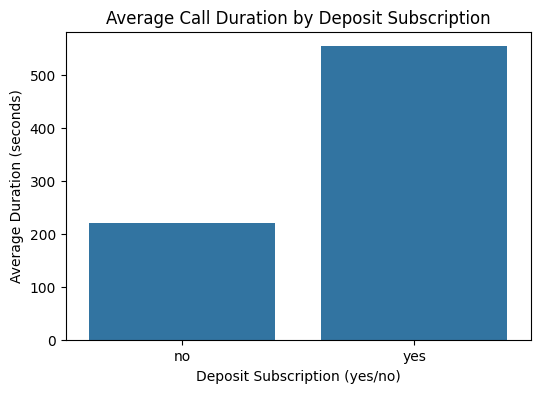

In [ ]:
# Average balance by deposit subscription

avg_duration = df.groupby('y')['duration'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='y', y='duration', data=avg_duration)
plt.title("Average Call Duration by Deposit Subscription")
plt.xlabel("Deposit Subscription (yes/no)")
plt.ylabel("Average Duration (seconds)")
plt.show()


## Campaign Effectiveness

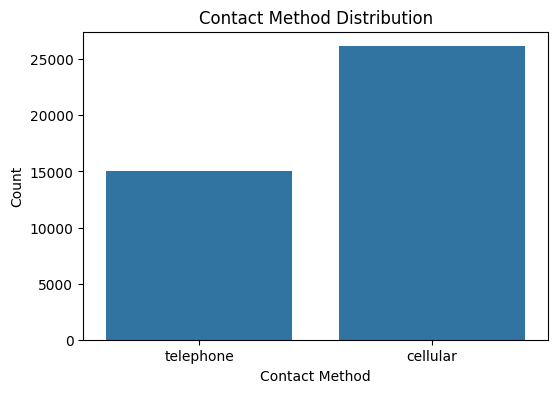

In [ ]:

# Contact method analysis

plt.figure(figsize=(6,4))
sns.countplot(x='contact', data=df)
plt.title("Contact Method Distribution")
plt.xlabel("Contact Method")
plt.ylabel("Count")
plt.show()


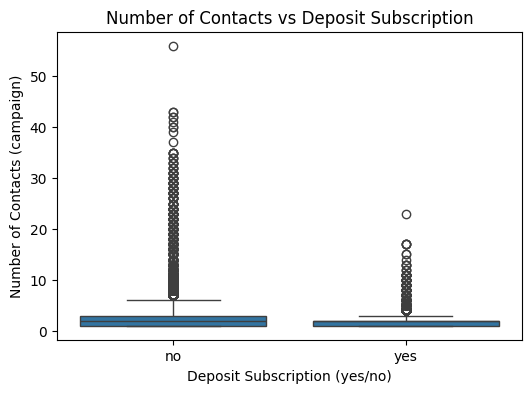

In [ ]:
# Number of contacts vs deposit subscription

plt.figure(figsize=(6,4))
sns.boxplot(x='y', y='campaign', data=df)
plt.title("Number of Contacts vs Deposit Subscription")
plt.xlabel("Deposit Subscription (yes/no)")
plt.ylabel("Number of Contacts (campaign)")
plt.show()


## Correlation Heatmap

In [ ]:
# Correlation of numerical variables
numeric_df = df.select_dtypes(include=['int64', 'float64'])


In [ ]:
corr = numeric_df.corr()

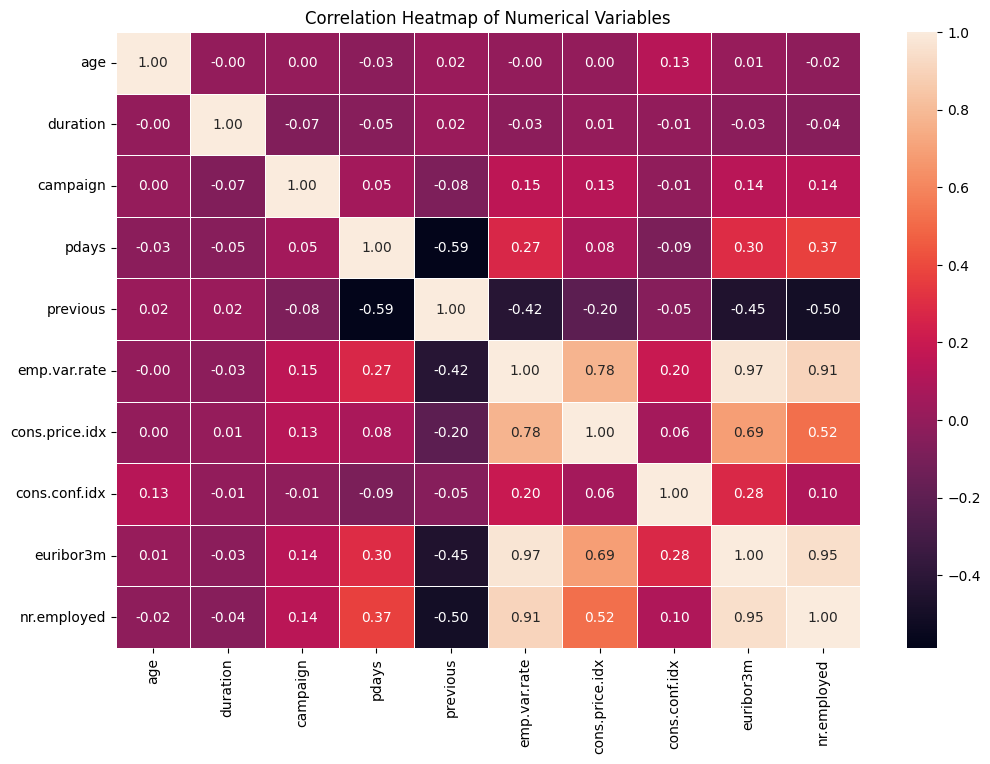

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

## Predictive Modeling (Logistic Regression)

In [ ]:


# Encode categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split







In [ ]:

X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

In [ ]:
#predictions
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9110220927409566

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:
# Feature importance
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [ ]:
ohe_features = rf_model.named_steps['preprocess'].transformers_[0][1]\
                .get_feature_names_out(cat_cols)

In [ ]:

all_features = list(ohe_features) + list(num_cols)

In [ ]:

importances = rf_model.named_steps['classifier'].feature_importances_

In [ ]:
feat_imp = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_imp.head(20)

,Feature,Importance
54,duration,0.272531
61,euribor3m,0.093009
53,age,0.079444
62,nr.employed,0.047202
55,campaign,0.039334
56,pdays,0.031748
60,cons.conf.idx,0.027507
59,cons.price.idx,0.024228
52,poutcome_success,0.023523
58,emp.var.rate,0.021301


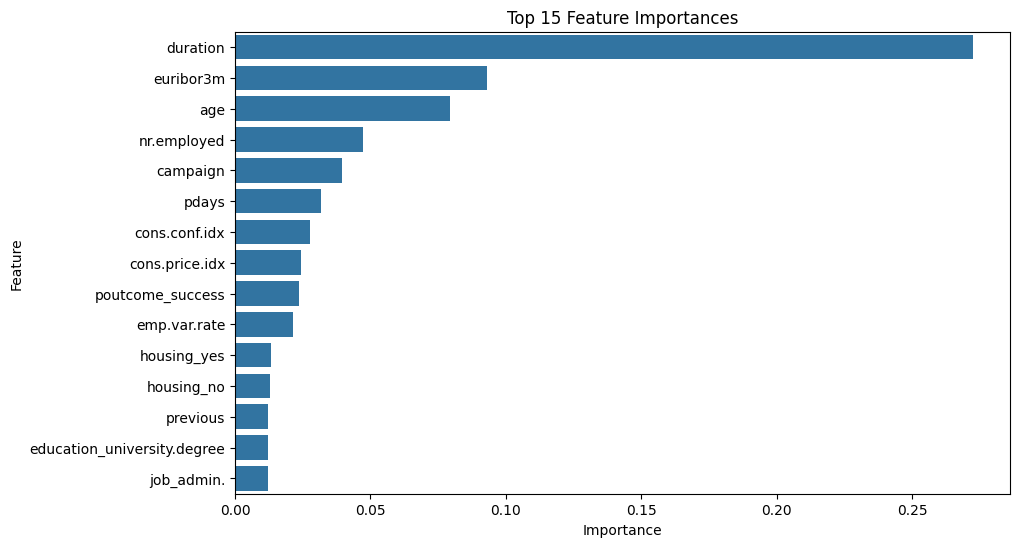

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15))
plt.title("Top 15 Feature Importances")
plt.show()

## Key Takeaways
- Certain age groups and job categories are more likely to subscribe.
- Higher balances correlate with higher subscription rates.
- Cellular contact is more effective than telephone.
- Campaign duration and number of contacts influence outcomes.
- Logistic regression shows which features are strongest predictors.

In [ ]:
!zip final_submission.zip data.csv your_notebook.ipynb

	zip warning: name not matched: your_notebook.ipynb
  adding: data.csv (deflated 93%)


In [ ]:
from google.colab import files
files.download('final_submission.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>